In [3]:
from nltk.sentiment import SentimentIntensityAnalyzer

/Users/lola/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
import pandas as pd
import numpy as ns

In [5]:
df = pd.read_csv('winemag-data_first150k.csv')

In [6]:
description = df['description'].values.tolist()

In [7]:
sid = SentimentIntensityAnalyzer()
for idx, document in df.iterrows():
    ss = sid.polarity_scores(document['description'])
    df.loc[idx, 'sentiment'] = ss['compound']

In [8]:
list(df.columns.values)

['Unnamed: 0',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery',
 'sentiment']

In [9]:
df.head()

Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN       Tinta de Toro   
2     Knights Valley             Sonoma     Sauvignon Blanc   
3  Willamette Valley  Willamette Valley          Pinot Noir   
4             Bandol                NaN  Provence red blend   

                    winery  sentiment  
0                    Heitz     0.9287  
1  Bodega Carmen Rodríguez     0.7311  
2                 Macauley     0.8070  
3                    Ponzi     0.2023  
4     Domaine de la Bégude     0.7717

In [10]:
df.sort_values('sentiment')

Unnamed: 0    country  \
85156        85156         US   
20806        20806         US   
91311        91311  Australia   
48261        48261  Australia   
38644        38644      Spain   
11554        11554      Spain   
46608        46608      Spain   
118878      118878      Spain   
105948      105948      Spain   
114334      114334         US   
142174      142174         US   
106996      106996         US   
83559        83559      Spain   
133785      133785         US   
134723      134723      Spain   
113513      113513      Spain   
58862        58862         US   
60773        60773         US   
92705        92705         US   
40535        40535         US   
105803      105803  Argentina   
66208        66208         US   
136980      136980    Germany   
18021        18021      Spain   
71811        71811      Spain   
149938      149938         US   
83234        83234      Spain   
45728        45728         US   
105038      105038         US   
124655      124655      Spain   
...            ...        ...   
52810        52810         US   
84430        84430         US   
26470        26470         US   
61676        61676         US   
26692        26692         US   
118146      118146         US   
114556      114556         US   
143776      143776         US   
55859        55859     France   
98819        98819     France   
98647        98647         US   
122767      122767         US   
121769      121769     France   
21622        21622         US   
148179      148179   Portugal   
116569      116569      Italy   
21446        21446         US   
128689      128689      Italy   
121310      121310         US   
65330        65330         US   
116690      116690         US   
4234          4234     France   
4473          4473     France   
63207        63207         US   
117357      117357         US   
137404      137404         US   
115564      115564         US   
149172      149172     France   
66012        66012     France   
5386          5386     France   

                                              description  \
85156   The vintage was terribly difficult, with cold ...   
20806   The vintage was terribly difficult, with cold ...   
91311   There's a lifted quality to the bouquet of thi...   
48261   There's a lifted quality to the bouquet of thi...   
38644   This is an underripe stench bomb with pyrazine...   
11554   This is an underripe stench bomb with pyrazine...   
46608   Hard, leathery aromas, with an intense but exc...   
118878  Hard, leathery aromas, with an intense but exc...   
105948  Hard, leathery aromas, with an intense but exc...   
114334  The vineyard is in the extreme, “true” Sonoma ...   
142174  The vineyard is in the extreme, “true” Sonoma ...   
106996  Disagreeable for its harsh acidity and vegetal...   
83559   This small-production (200 cases), barrel-aged...   
133785  Suffers from the common new winery kinds of fa...   
134723  Not a complete swing and a miss, but nothing s...   
113513  Not a complete swing and a miss, but nothing s...   
58862   Winemaker Ross Cobb, formerly with Williams Se...   
60773   Nasty. Hits the mouth with astringent green fl...   
92705   Very, very dry, but bitter in raisinskin flavo...   
40535   Very, very dry, but bitter in raisinskin flavo...   
105803  Atypical on the nose, as air freshener, berry ...   
66208   From a winery in the heart of Napa that has lo...   
136980  Still in need of cellaring or decanting to rid...   
18021   Prune and other overweight aromas carry the no...   
71811   Prune and other overweight aromas carry the no...   
149938  From a winery in the heart of Napa that has lo...   
83234   Pungent on the nose, this offers blasts of net...   
45728   The vineyard is a great one, but this wine has...   
105038  The vineyard is a great one, but this wine has...   
124655  All over the map. The nose offers toast offset...   
...                                                   ...   
52810   T

In [62]:
df= pd.read_csv('./wine_sentiment.csv')

In [63]:
df = df.dropna(subset= ['sentiment'])

In [64]:
df[df['country'] == 'US']['sentiment'].mean()


0.5566157235123721

In [65]:
c = df['country'].unique()

In [66]:
mean_list = {}
for item in c:
    temp_mean = df[df['country'] == item]['sentiment'].mean()
    mean_list[item] = temp_mean

df_mean = pd.DataFrame.from_dict(mean_list, orient='index')
df_mean = df_mean.sort_values(0).dropna()

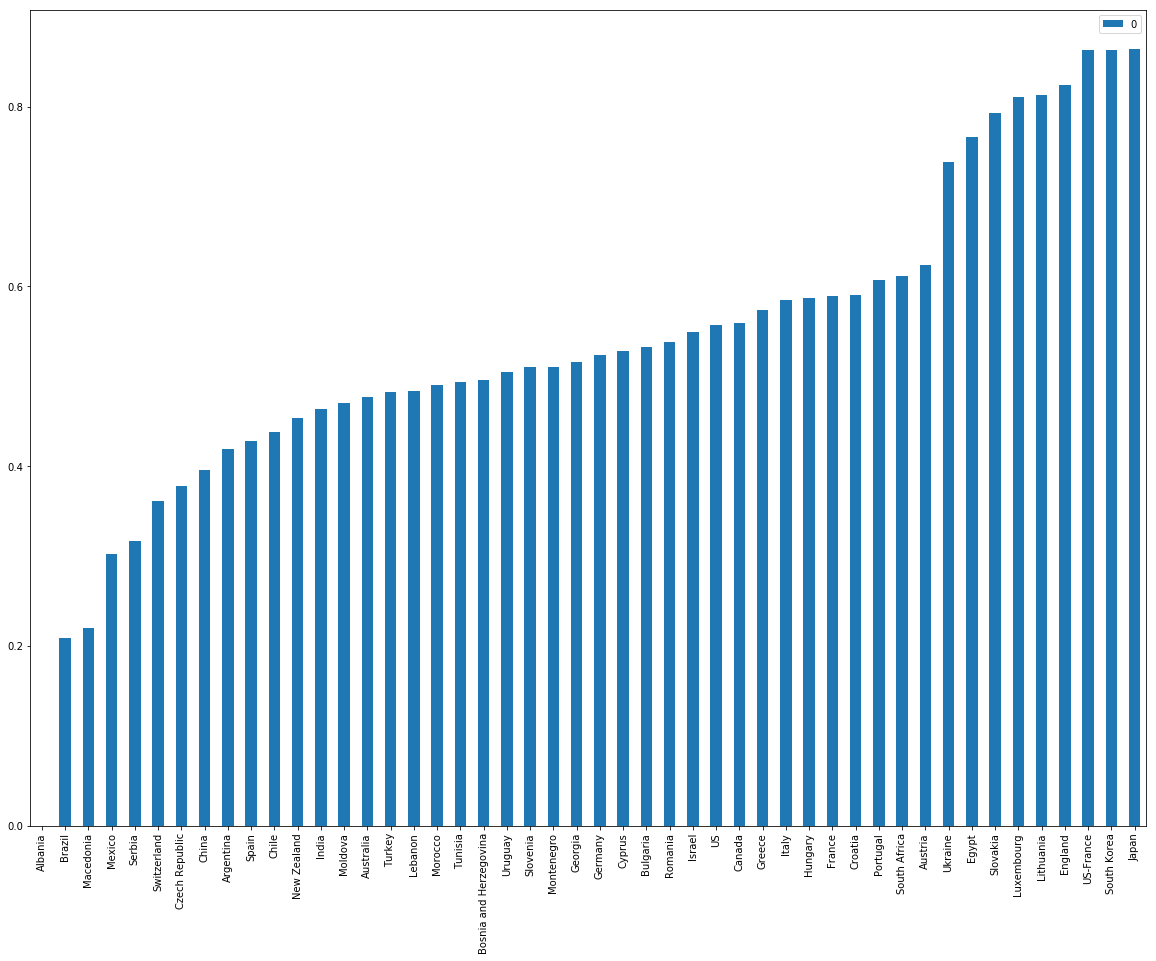

In [67]:
import matplotlib.pyplot as plt
% matplotlib inline
df_mean.plot(kind= 'bar', figsize= (20,15))

In [72]:
df[df['country'] == 'Albania']['sentiment']

4642    0.0
4864    0.0
Name: sentiment, dtype: float64

In [73]:
unique_var = df['variety'].unique()
varietymap = {}
for item in unique_var:
    temp_mean = df[df['variety'] == item]['sentiment'].mean()
    varietymap[item] = temp_mean

variety_mean = pd.DataFrame.from_dict(varietymap, orient='index')
variety_mean = variety_mean.sort_values(0).dropna()

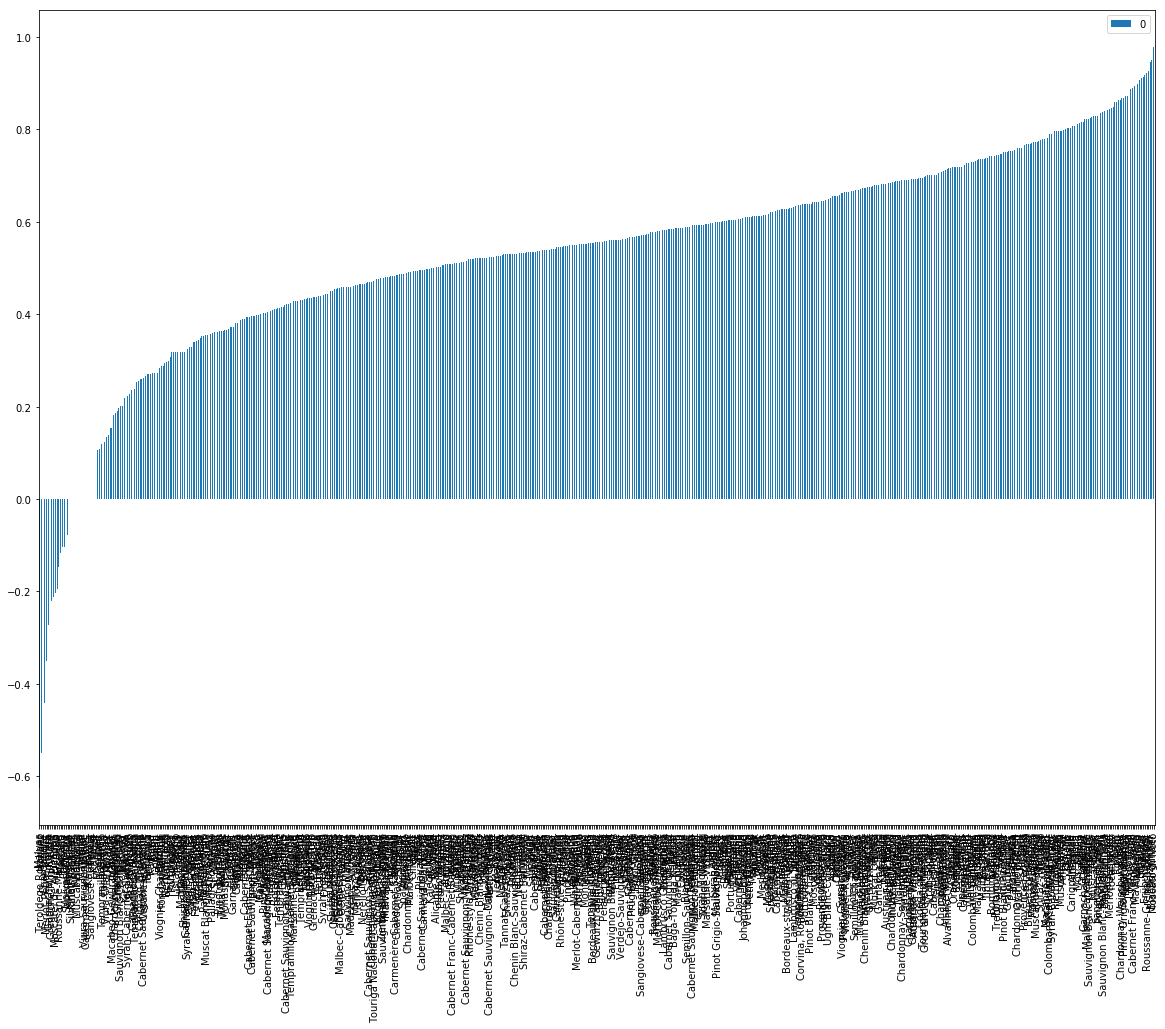

In [74]:
variety_mean.plot(kind= 'bar', figsize= (20,15))

In [75]:
print(variety_mean)

                                       0
Malvar                         -0.625500
Teroldego Rotaliano            -0.549900
Jacquez                        -0.449700
Chardonelle                    -0.440400
Merlot-Petite Verdot           -0.350600
Kuntra                         -0.273200
Garnacha Tintorera             -0.273200
Grenache-Mourvèdre             -0.221350
Picapoll                       -0.212167
Moscatel de Alejandría         -0.202300
Airen                          -0.194150
Roussanne-Marsanne             -0.146800
Mazuelo                        -0.117700
Forcallà                       -0.102700
Carineña                       -0.102700
Malvasia-Viura                 -0.096650
Saperavi-Merlot                -0.077200
Huxelrebe                       0.000000
Silvaner-Traminer               0.000000
Kinali Yapincak                 0.000000
Chardonel                       0.000000
Mandilaria                      0.000000
Muscat Hamburg                  0.000000
Freisa          

In [77]:
us_prov = df[df['country'] == 'US']['province'].unique()
print(us_prov)

['California' 'Oregon' 'Washington' 'Idaho' 'New York' 'Virginia'
 'Colorado' 'Arizona' 'America' 'North Carolina' 'New Mexico' 'Missouri'
 'Pennsylvania' 'Ohio' 'Massachusetts' 'New Jersey' 'Michigan' 'Texas'
 'Washington-Oregon' 'Iowa' 'Vermont' 'Connecticut' 'Kentucky' 'Nevada']


In [78]:
prov_map = {}
for item in us_prov:
    temp_mean = df[df['province'] == item]['sentiment'].mean()
    prov_map[item] = temp_mean

prov_mean = pd.DataFrame.from_dict(prov_map, orient='index')
prov_mean = prov_mean.sort_values(0).dropna()

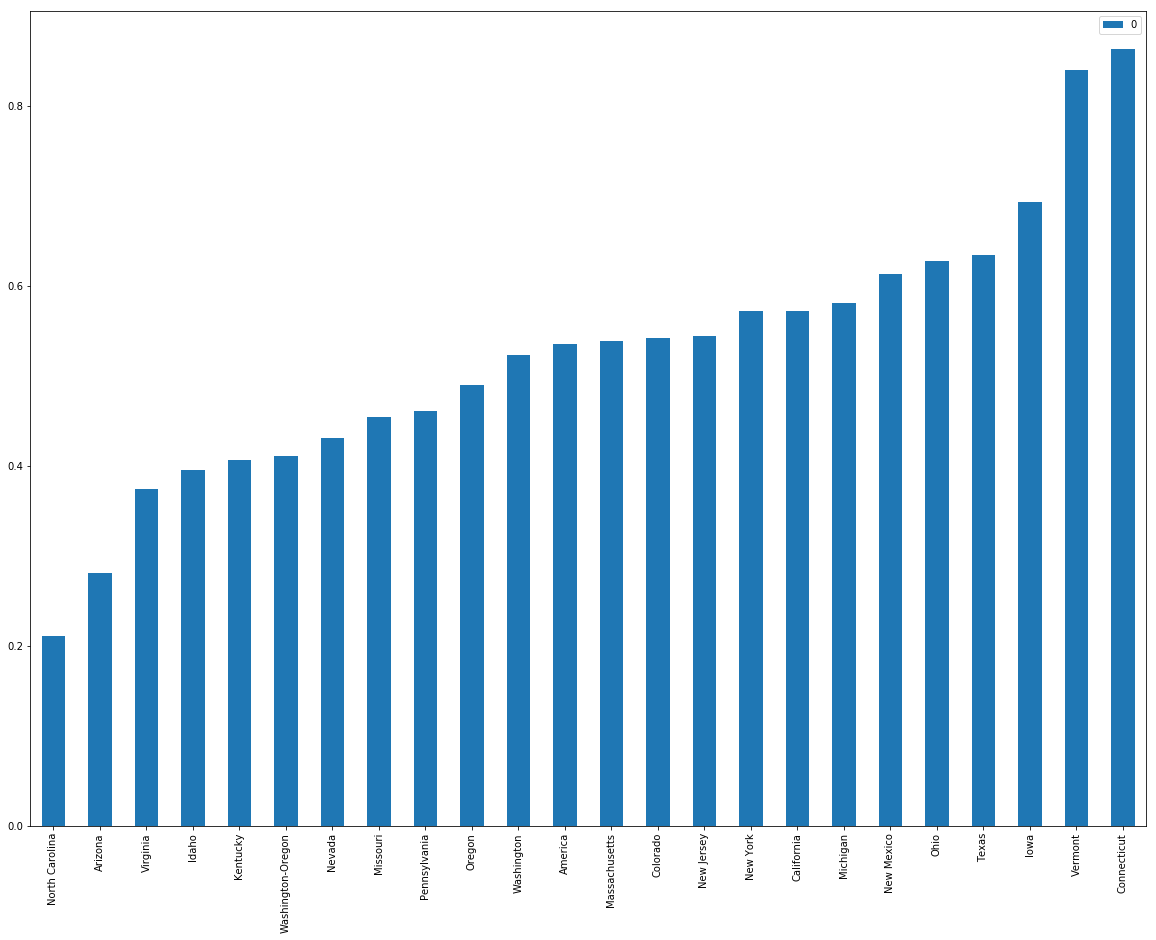

In [79]:
prov_mean.plot(kind= 'bar', figsize= (20,15))